# Austin Kinzer - MEGN 570 - Modeling Project

## Cost Versus Performance Tradeoffs of Varying Loading of Platinum in Catalyst Layer of Proton Exchange Membrane Fuel Cells

### Disclaimer

    This is largely based off the PEMFC code examples. 
    I have no clue what I'm doing in Python (yet!). 

### Introduction
The goal of this project is to quantify the cost and performance tradeoffs of reducing the fraction of platinum in the catalyst layer for a proton-exchange membrane (PEM) fuel cell. Platinum is the primary electrocatalyst used in PEM fuel cells. The extremely high cost of platinum (~$33,000/kg) is a major component of overall PEM fuel cost, and a barrier to widespread adoption of PEM fuel cells for applications such as transportation and power generation. Additionally, due to the high cost of platinum, catalyst costs do not benefit significantly from economies of scale associated with higher production volumes of fuel cells [4]. This means that reducing the amount of platinum in the catalyst is crucial to reducing system costs for fuel cells to increase cost competitiveness with other technologies. Quantifying the performance tradeoffs of reducing the fraction of platinum would allow one to determine the optimal amount of platinum catalyst that should be used to produce the most cost-effective fuel cell. 

### Model Formulation
For the purposes of this project, a number of simplifications and assumptions are made to allow for a relatively straightforward model which manipulates a single variable -- the fraction of surface area of the carbon in the catalyst layer covered by platinum. Importantly, this is a one-dimensional model of a PEMFC, which considers area and volume solely as necessary to quantify electrochemical processes and volumes of solids within a hypothetical fuel cell. Another assumption is that the diameter of the carbon particles and platinum particles in the catalyst layer are constant. Though it would be worth further investigation to understand the effect of changing the diameter of platinum particles within the catalyst layer, that is beyond the scope of this project. Other than the platinum surface area fraction, all other inputs are held constant in the model, including external current, particle diameter, porosity, etc.

To determine the value of the platinum in the catalyst layer based on the fraction of the carbon surface area covered by platinum, it is necessary to determine mass of platinum represented by a given surface area fraction. A number of assumptions are necessary to accomplish this. First, the diameters of carbon and platinum particles in the catalyst layer are estimated at 50 nm and 2 nm, respectively [3, 6]. Additionally, the density of platinum is assumed to be 21,450 kg/m^3, and it is assumed that this does not vary substantially with temperature [2]. For cost assessments, the price of platinum is assumed to be 33,000 dollars per kilogram [5]. The fraction of solids in the catalyst layer, which includes both carbon and platinum is assumed to be 0.6. Finally, the area of carbon which a single platinum particle covers is assumed to be equal to the cross-sectional area of the platinum particle. The length and width of the fuel cell are assumed to be 25 cm and 18 cm [1], respectively, with the height of the catalyst layer being 4 micrometers [6]. For the purposes of this model, we are only considering the active area in the catalyst layer, not considering inlet & outlet channels for air and fuel. 

Under these assumptions, it is possible to determine the value of the platinum in a catalyst layer. First, consider that the total volume of solids is equal to the volume of the catalyst layer (length x height x width) multiplied by the fraction of solids in the catalyst layer:
$$V_s=lwh\epsilon$$
Where $\epsilon$ represents the volume fraction of solids in the catalyst layer. This volume is equal to the sum of the volume of each type of particle times the number of each particle:
$$V_s=V_Cn_C + V_Pn_P$$
Next, we know that the surface fraction of platinum on the carbon is equal to the cross-sectional area of the platinum particles times the number of platinum particles over the surface area of the carbon particles times the number of carbon particles. We can then use this relationship to create an expression for $n_C$, which is the number of carbon particles in the catalyst layer:
$$n_C = V_s[1/((4/3)r_C^3\pi + 4/3A_fr_P4r_C^2\pi)]$$
Where $r_C$ and $r_P$ represents the radius of carbon and platinum particles, respectively, and $A_f$ represents the surface area fraction of carbon covered by platinum.
Solving this equation, we can get the number of carbon particles, which can be used to solve for the number of platinum particles:
$$n_P = 4n_CA_fr_C^2/r_P^2$$
Now, both the number of platinum particles and their diameter are known values, so it is a simple matter to calculate the total volume of platinum using the equation for the volume of a sphere, then determine the mass of platinum using $\rho_P$, the density of platinum, and finally determine the value of this mass of platinum by multiplying by the price of platinum.

### Results

The plot below shows the value of platinum in the catalyst layer as a function of the fraction of surface area of carbon covered by the platinum. Unsurprisingly, this relationship is approximately linear, with the cost gradually increasing as the amount of platinum increases. 

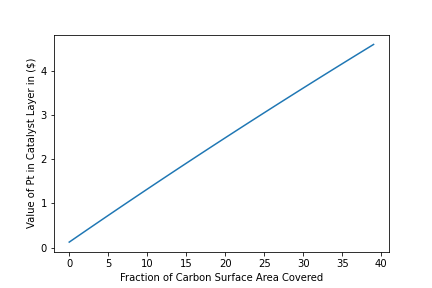

In [18]:
from IPython.core.display import Image
Image('Value.v.SAfraction.png')

The next two charts show the double layer potentials over time for the platinum surface area fractions of 0.01 and 0.40, at the ends of the range considered by the model.

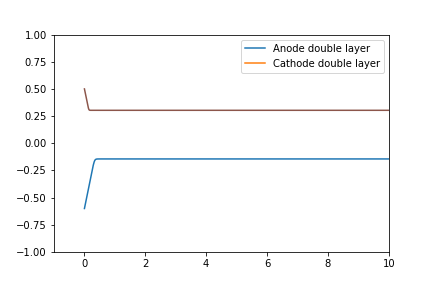

In [19]:
from IPython.core.display import Image
Image('dlpotential01.png')

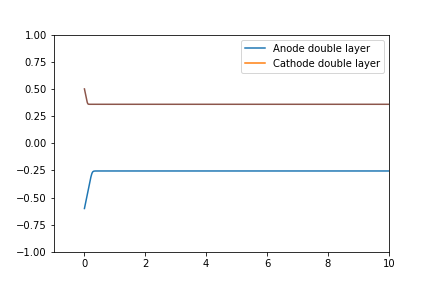

In [20]:
from IPython.core.display import Image
Image('dlpotential40.png')

### Discussion
To be perfectly honest, I struggled to do much further analysis with these results to understand how the performance of the fuel cell is actually impacted by the varying fraction of platinum in the catalyst layer. Intuitively, I understand that the fuel cell performance should improve as the fraction of platinum increases, up to a certain point, but it is difficult to parse out exactly what is going on in the data here. 

The most noticeable result is that as the fraction of platinum increases, the gap between the steady state electric potentials at the cathode and anode is larger. This larger potential difference should mean that one can get more current out of a single cell. The next step would be to find a quantitative measure of what that implies for fuel cell performance, and compare that with the increased cost. 

To take a full accounting of the costs and benefits of increased platinum loading, there are a number of other factors that would need to be considered. For example, though increasing platinum loading increases the cost of the catalyst layer, there may be savings on the balance of system due to a smaller stack size. It's also possible that it could increase balance of system costs due to increased thermal management needs. 


### Conclusion

Ultimately, this project does not fully address the question it sought to answer:
    
    "What are the cost and performance tradeoffs of changing the loading of platinum in the catalyst layer?"
    
Changing the fraction of platinum in the catalyst layer does impact the fuel cell performance as expected, with greater platinum fractions leading to a greater steady state cell potential, which means that a single cell can produce more current. To start to address the original question, the next step would be to quantify in the increase in current density with varying platinum loading, and compare that to the increased cost. Based on the outputs here, I would expect to see a cost/performance ratio that favors lower platinum loading, as the marginal increase in the cell potential could easily be dwarfed by added costs for a stack with many cells.

The benefits of higher power density depend on the application for which the fuel cell will be used. For a fuel cell electric vehicle (or forklift), the need for high power density may outweigh the additional costs of higher costs for more platinum. Similarly, for lower power density applications, such as stationary power generation, it may make sense for fuel cell manufacturers to favor lower fractions of platinum in the catalyst, as the lower power density is less of a factor. Further study (and a better understanding of Python) is necessary to produce more meaningful analysis of the data presented here.


### Extra Credit

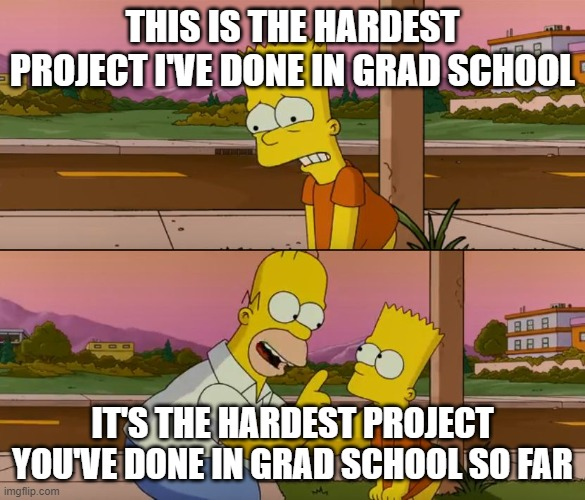

In [17]:
from IPython.core.display import Image
Image('echem project.jpg')

### References
[1] D. Wheeler and G. Sverdrup, “2007 Status of Manufacturing: Polymer Electrolyte Membrane (PEM) Fuel Cells,” NREL/TP-560- 
    41655, 924988, Mar. 2008. doi: 10.2172/924988.

[2] “Density of Selected Solids.” https://www.engineeringtoolbox.com/density-solids-d_1265.html (accessed Dec. 17, 2020).

[3] S. Holdcroft, “Fuel Cell Catalyst Layers: A Polymer Science Perspective,” Chem. Mater., vol. 26, no. 1, pp. 381–393, Jan. 
    2014, doi: 10.1021/cm401445h.

[4] “Manufacturing Cost Analysis of PEM Fuel Cell Systems for 5- and 10-kW Backup Power Applications,” p. 124, 2016.

[5] “Platinum Price per Kilo USD.” https://www.bullionbypost.com/platinum-price/platinum-price-per-kilo/ (accessed Dec. 17, 
    2020).

[6] M. Darab, A. O. Barnett, G. Lindbergh, M. S. Thomassen, and S. Sunde, “The Influence of Catalyst Layer Thickness on the 
    Performance and Degradation of PEM Fuel Cell Cathodes with Constant Catalyst Loading,” Electrochimica Acta, vol. 232, pp. 
    505–516, Apr. 2017, doi: 10.1016/j.electacta.2017.02.101.

[7] J. Benziger, J. Nehlsen, D. Blackwell, T. Brennan, and J. Itescu, “Water flow in the gas diffusion layer of PEM fuel 
    cells,” Journal of Membrane Science, vol. 261, no. 1–2, pp. 98–106, Sep. 2005, doi: 10.1016/j.memsci.2005.03.049.

[8] Fuller, Thomas F. Harb, John N.. (2018). Electrochemical Engineering - 10.4 Basic Construction and Components. John Wiley & 
    Sons. Retrieved from
    https://app.knovel.com/hotlink/pdf/id:kt011IB8NB/electrochemical-engineering/basic-construction-components

### Appendix: code snippets

In [7]:
def pemfc_model(Pt_surf=None):
    from scipy.integrate import solve_ivp 
    import empty_model
    from empty_model import pars, SV_0, ptr
    from empty_model import residual 
    from empty_model import pemfc_gas_flux
    from empty_model import pemfc_pt_cost

    # Parse and overwrite surface area fraction of platinum on carbon:
    if Pt_surf:
        pars.Pt_surf = Pt_surf

    solution = solve_ivp(lambda t, y: residual(t, y, pars, ptr),
        pars.time_span, SV_0, rtol=1e-9, atol=1e-7, method='BDF')
   
    
    # Returns solution results
    return solution
    


In [8]:
pemfc_model(0.01)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 479
     njev: 11
      nlu: 45
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.43042356e-08, 2.86084712e-08, 1.71650827e-07,
       3.14693183e-07, 1.74511674e-06, 3.17554031e-06, 1.74797759e-05,
       3.17840115e-05, 1.74826368e-04, 3.17868724e-04, 4.60911080e-04,
       1.89133464e-03, 3.32175820e-03, 1.76259938e-02, 3.19302294e-02,
       4.52729435e-02, 5.37993111e-02, 6.02919953e-02, 6.67846794e-02,
       7.11381776e-02, 7.54916758e-02, 7.87723386e-02, 8.20530014e-02,
       8.53336643e-02, 8.96767240e-02, 9.40197838e-02, 9.70237452e-02,
       1.00027707e-01, 1.03031668e-01, 1.06035629e-01, 1.09179012e-01,
       1.12322396e-01, 1.15465779e-01, 1.18609162e-01, 1.21752545e-01,
       1.25223439e-01, 1.28694334e-01, 1.31376629e-01, 1.34058925e-01,
       1.36741220e-01, 1.39423515e-01, 1.42105811e-01, 1.45131401e-01,
       1.48156990e-01, 1.50495756e-01,

In [9]:
pemfc_model(0.10)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 480
     njev: 8
      nlu: 61
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.43042354e-08, 2.86084707e-08, 1.71650824e-07,
       3.14693178e-07, 1.74511671e-06, 3.17554025e-06, 1.74797756e-05,
       3.17840110e-05, 1.74826365e-04, 3.17868718e-04, 4.60911072e-04,
       1.89133461e-03, 3.32175814e-03, 1.27844323e-02, 1.92658279e-02,
       2.43845564e-02, 2.95032849e-02, 3.66758581e-02, 4.17944976e-02,
       4.69131371e-02, 5.06022782e-02, 5.42914193e-02, 5.72069978e-02,
       6.01225763e-02, 6.30381548e-02, 6.70782047e-02, 7.11182546e-02,
       7.39820552e-02, 7.68458558e-02, 7.97096564e-02, 8.25734571e-02,
       8.56529817e-02, 8.87325063e-02, 9.18120310e-02, 9.48915556e-02,
       9.79710802e-02, 1.01906157e-01, 1.04935772e-01, 1.07965386e-01,
       1.10114624e-01, 1.12263863e-01, 1.14413101e-01, 1.16562339e-01,
       1.18711577e-01, 1.21409268e-01, 

In [10]:
pemfc_model(0.20)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 442
     njev: 6
      nlu: 38
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.43042344e-08, 2.86084689e-08, 1.71650813e-07,
       3.14693158e-07, 1.74511660e-06, 3.17554005e-06, 1.74797745e-05,
       3.17840089e-05, 1.74826353e-04, 3.17868698e-04, 4.60911042e-04,
       1.89133449e-03, 3.32175793e-03, 1.28609346e-02, 2.24001113e-02,
       2.87938310e-02, 3.39240529e-02, 3.90542747e-02, 4.27982548e-02,
       4.65422349e-02, 4.94830374e-02, 5.24238399e-02, 5.53646424e-02,
       5.94273857e-02, 6.34901290e-02, 6.63638621e-02, 6.92375952e-02,
       7.21113283e-02, 7.49850613e-02, 7.80689015e-02, 8.11527417e-02,
       8.42365819e-02, 8.73204220e-02, 9.04042622e-02, 9.42858487e-02,
       9.73258156e-02, 1.00365782e-01, 1.02518512e-01, 1.04671241e-01,
       1.06823971e-01, 1.08976700e-01, 1.11129429e-01, 1.13854751e-01,
       1.16580072e-01, 1.19305393e-01, 

In [11]:
pemfc_model(0.30)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 427
     njev: 7
      nlu: 37
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.43042329e-08, 2.86084657e-08, 1.71650794e-07,
       3.14693123e-07, 1.74511641e-06, 3.17553969e-06, 1.74797725e-05,
       3.17840054e-05, 1.74826334e-04, 3.17868662e-04, 4.60910991e-04,
       1.89133428e-03, 3.32175756e-03, 1.16890573e-02, 2.00563570e-02,
       2.60425825e-02, 3.20288079e-02, 3.61120223e-02, 4.01952367e-02,
       4.33276107e-02, 4.64599847e-02, 4.95923588e-02, 5.38155475e-02,
       5.80387362e-02, 6.09879740e-02, 6.39372118e-02, 6.68864495e-02,
       6.98356873e-02, 7.29539803e-02, 7.60722733e-02, 7.91905663e-02,
       8.23088592e-02, 8.54271522e-02, 8.90239006e-02, 9.26206489e-02,
       9.52592135e-02, 9.78977781e-02, 1.00536343e-01, 1.03174907e-01,
       1.05813472e-01, 1.08724251e-01, 1.11635031e-01, 1.13578777e-01,
       1.15522523e-01, 1.17466269e-01, 

In [12]:
pemfc_model(0.40)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 401
     njev: 5
      nlu: 36
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.43042306e-08, 2.86084612e-08, 1.71650767e-07,
       3.14693073e-07, 1.74511613e-06, 3.17553919e-06, 1.74797698e-05,
       3.17840004e-05, 1.74826306e-04, 3.17868612e-04, 4.60910918e-04,
       1.89133398e-03, 3.32175703e-03, 1.09350925e-02, 1.85484279e-02,
       2.42299959e-02, 2.99115640e-02, 3.38646652e-02, 3.78177665e-02,
       4.08775113e-02, 4.39372562e-02, 4.69970011e-02, 5.11601806e-02,
       5.53233601e-02, 5.82446537e-02, 6.11659472e-02, 6.40872408e-02,
       6.70085344e-02, 7.01140303e-02, 7.32195262e-02, 7.63250221e-02,
       7.94305181e-02, 8.25360140e-02, 8.62176195e-02, 8.98992250e-02,
       9.25155419e-02, 9.51318588e-02, 9.77481757e-02, 1.00364493e-01,
       1.02980810e-01, 1.05854047e-01, 1.08727284e-01, 1.11600521e-01,
       1.14473758e-01, 1.17346995e-01, 

In [6]:
from empty_model import pemfc_pt_cost
from empty_model import pars
cost = pemfc_pt_cost(pars)   
print(cost)
    # shows variation in value of platinum in catalyst from a surface area fraction on the carbon of 0.01 to 0.40

[0.12212109 0.24385263 0.3651965  0.48615453 0.60672857 0.72692044
 0.84673196 0.96616493 1.08522114 1.20390236 1.32221038 1.44014694
 1.55771379 1.67491268 1.79174531 1.90821342 2.02431869 2.14006283
 2.25544752 2.37047442 2.4851452  2.59946151 2.713425   2.82703729
 2.9403     3.05321475 3.16578313 3.27800674 3.38988716 3.50142595
 3.6126247  3.72348493 3.83400821 3.94419605 4.05405    4.16357156
 4.27276224 4.38162353 4.49015693 4.59836391]


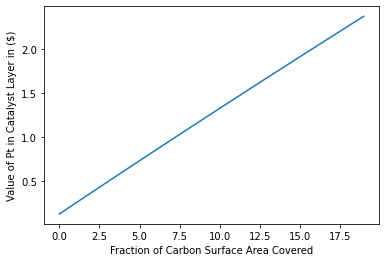

In [128]:
import matplotlib.pyplot as plt
plt.plot(cost)
plt.ylabel('Value of Pt in Catalyst Layer in ($)')
plt.xlabel('Fraction of Carbon Surface Area Covered')
plt.show()